In [43]:
#importing of libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [44]:
#I used jupyter notebook in visual basic code this is loading the dataset into a pandas DataFrame
source='C:/Users/knigh/Downloads/WA_Fn-UseC_-Telco-Customer-Churn_G9_new_15.csv'
data = pd.read_csv(source)

In [45]:
#analysing dtypes of features, the dataset has two float,one integer and 18 object

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7046 non-null   object 
 1   gender            7046 non-null   object 
 2   SeniorCitizen     7046 non-null   int64  
 3   Partner           7046 non-null   object 
 4   Dependents        7046 non-null   object 
 5   tenure            7028 non-null   float64
 6   PhoneService      7046 non-null   object 
 7   MultipleLines     7046 non-null   object 
 8   InternetService   7046 non-null   object 
 9   OnlineSecurity    7018 non-null   object 
 10  OnlineBackup      7046 non-null   object 
 11  DeviceProtection  7046 non-null   object 
 12  TechSupport       7046 non-null   object 
 13  StreamingTV       7046 non-null   object 
 14  StreamingMovies   7046 non-null   object 
 15  Contract          7046 non-null   object 
 16  PaperlessBilling  7046 non-null   object 


In [46]:
# I decided to convert columns TotalCharges into Numeric and SeniorCitizen into object for better exploratory data analysis
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce') 
data['SeniorCitizen']=data['SeniorCitizen'].astype('object')

In [47]:
#Re_anaylsing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7046 non-null   object 
 1   gender            7046 non-null   object 
 2   SeniorCitizen     7046 non-null   object 
 3   Partner           7046 non-null   object 
 4   Dependents        7046 non-null   object 
 5   tenure            7028 non-null   float64
 6   PhoneService      7046 non-null   object 
 7   MultipleLines     7046 non-null   object 
 8   InternetService   7046 non-null   object 
 9   OnlineSecurity    7018 non-null   object 
 10  OnlineBackup      7046 non-null   object 
 11  DeviceProtection  7046 non-null   object 
 12  TechSupport       7046 non-null   object 
 13  StreamingTV       7046 non-null   object 
 14  StreamingMovies   7046 non-null   object 
 15  Contract          7046 non-null   object 
 16  PaperlessBilling  7046 non-null   object 


In [48]:
# Checking for missing values in dataset,it shows 51 missing data
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              18
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity      28
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       5
TotalCharges        11
Churn                0
dtype: int64

In [49]:
#dropping of null values more than 50% of the entire observations
null_percentage = data.isnull().mean() * 100
columns_to_drop = null_percentage[null_percentage > 50].index
data = data.drop(columns_to_drop, axis=1)

In [50]:
#Removing of missing dataset 
data=data.dropna()

In [51]:
#checking to see if all was removed
data.isnull().sum().sum()

0

In [52]:
#checking for duplicates
data.duplicated().sum()

2

In [53]:
# dropped duplicates
data=data.drop_duplicates()

In [54]:
# Rechecking data to reassure the count and dtype.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6983 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6983 non-null   object 
 1   gender            6983 non-null   object 
 2   SeniorCitizen     6983 non-null   object 
 3   Partner           6983 non-null   object 
 4   Dependents        6983 non-null   object 
 5   tenure            6983 non-null   float64
 6   PhoneService      6983 non-null   object 
 7   MultipleLines     6983 non-null   object 
 8   InternetService   6983 non-null   object 
 9   OnlineSecurity    6983 non-null   object 
 10  OnlineBackup      6983 non-null   object 
 11  DeviceProtection  6983 non-null   object 
 12  TechSupport       6983 non-null   object 
 13  StreamingTV       6983 non-null   object 
 14  StreamingMovies   6983 non-null   object 
 15  Contract          6983 non-null   object 
 16  PaperlessBilling  6983 non-null   object 
 17  

In [55]:
# checking info of numerical values
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,6983.000000,6983.000000,6983.000000
mean,32.387799,64.839081,2281.775218
std,24.534585,30.140637,2268.485701
min,1.000000,18.250000,18.800000
25%,9.000000,35.450000,401.200000
50%,29.000000,70.400000,1395.050000
75%,55.000000,89.950000,3783.200000
max,72.000000,118.750000,8684.800000


In [56]:
#removing of outliers 
upper_threshold = 200
lower_threshold = 10

# Apply outlier capping to the 'Feature' column
data['MonthlyCharges'] = np.where(data['MonthlyCharges'] > upper_threshold, upper_threshold, data['MonthlyCharges'])
data['MonthlyCharges'] = np.where(data['MonthlyCharges'] < lower_threshold, lower_threshold, data['MonthlyCharges'])

# Print the capped data
data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6983 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6983 non-null   object 
 1   gender            6983 non-null   object 
 2   SeniorCitizen     6983 non-null   object 
 3   Partner           6983 non-null   object 
 4   Dependents        6983 non-null   object 
 5   tenure            6983 non-null   float64
 6   PhoneService      6983 non-null   object 
 7   MultipleLines     6983 non-null   object 
 8   InternetService   6983 non-null   object 
 9   OnlineSecurity    6983 non-null   object 
 10  OnlineBackup      6983 non-null   object 
 11  DeviceProtection  6983 non-null   object 
 12  TechSupport       6983 non-null   object 
 13  StreamingTV       6983 non-null   object 
 14  StreamingMovies   6983 non-null   object 
 15  Contract          6983 non-null   object 
 16  PaperlessBilling  6983 non-null   object 
 17  

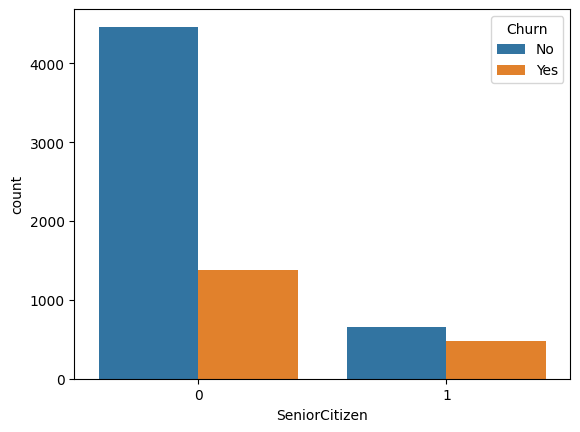

c:\Users\knigh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


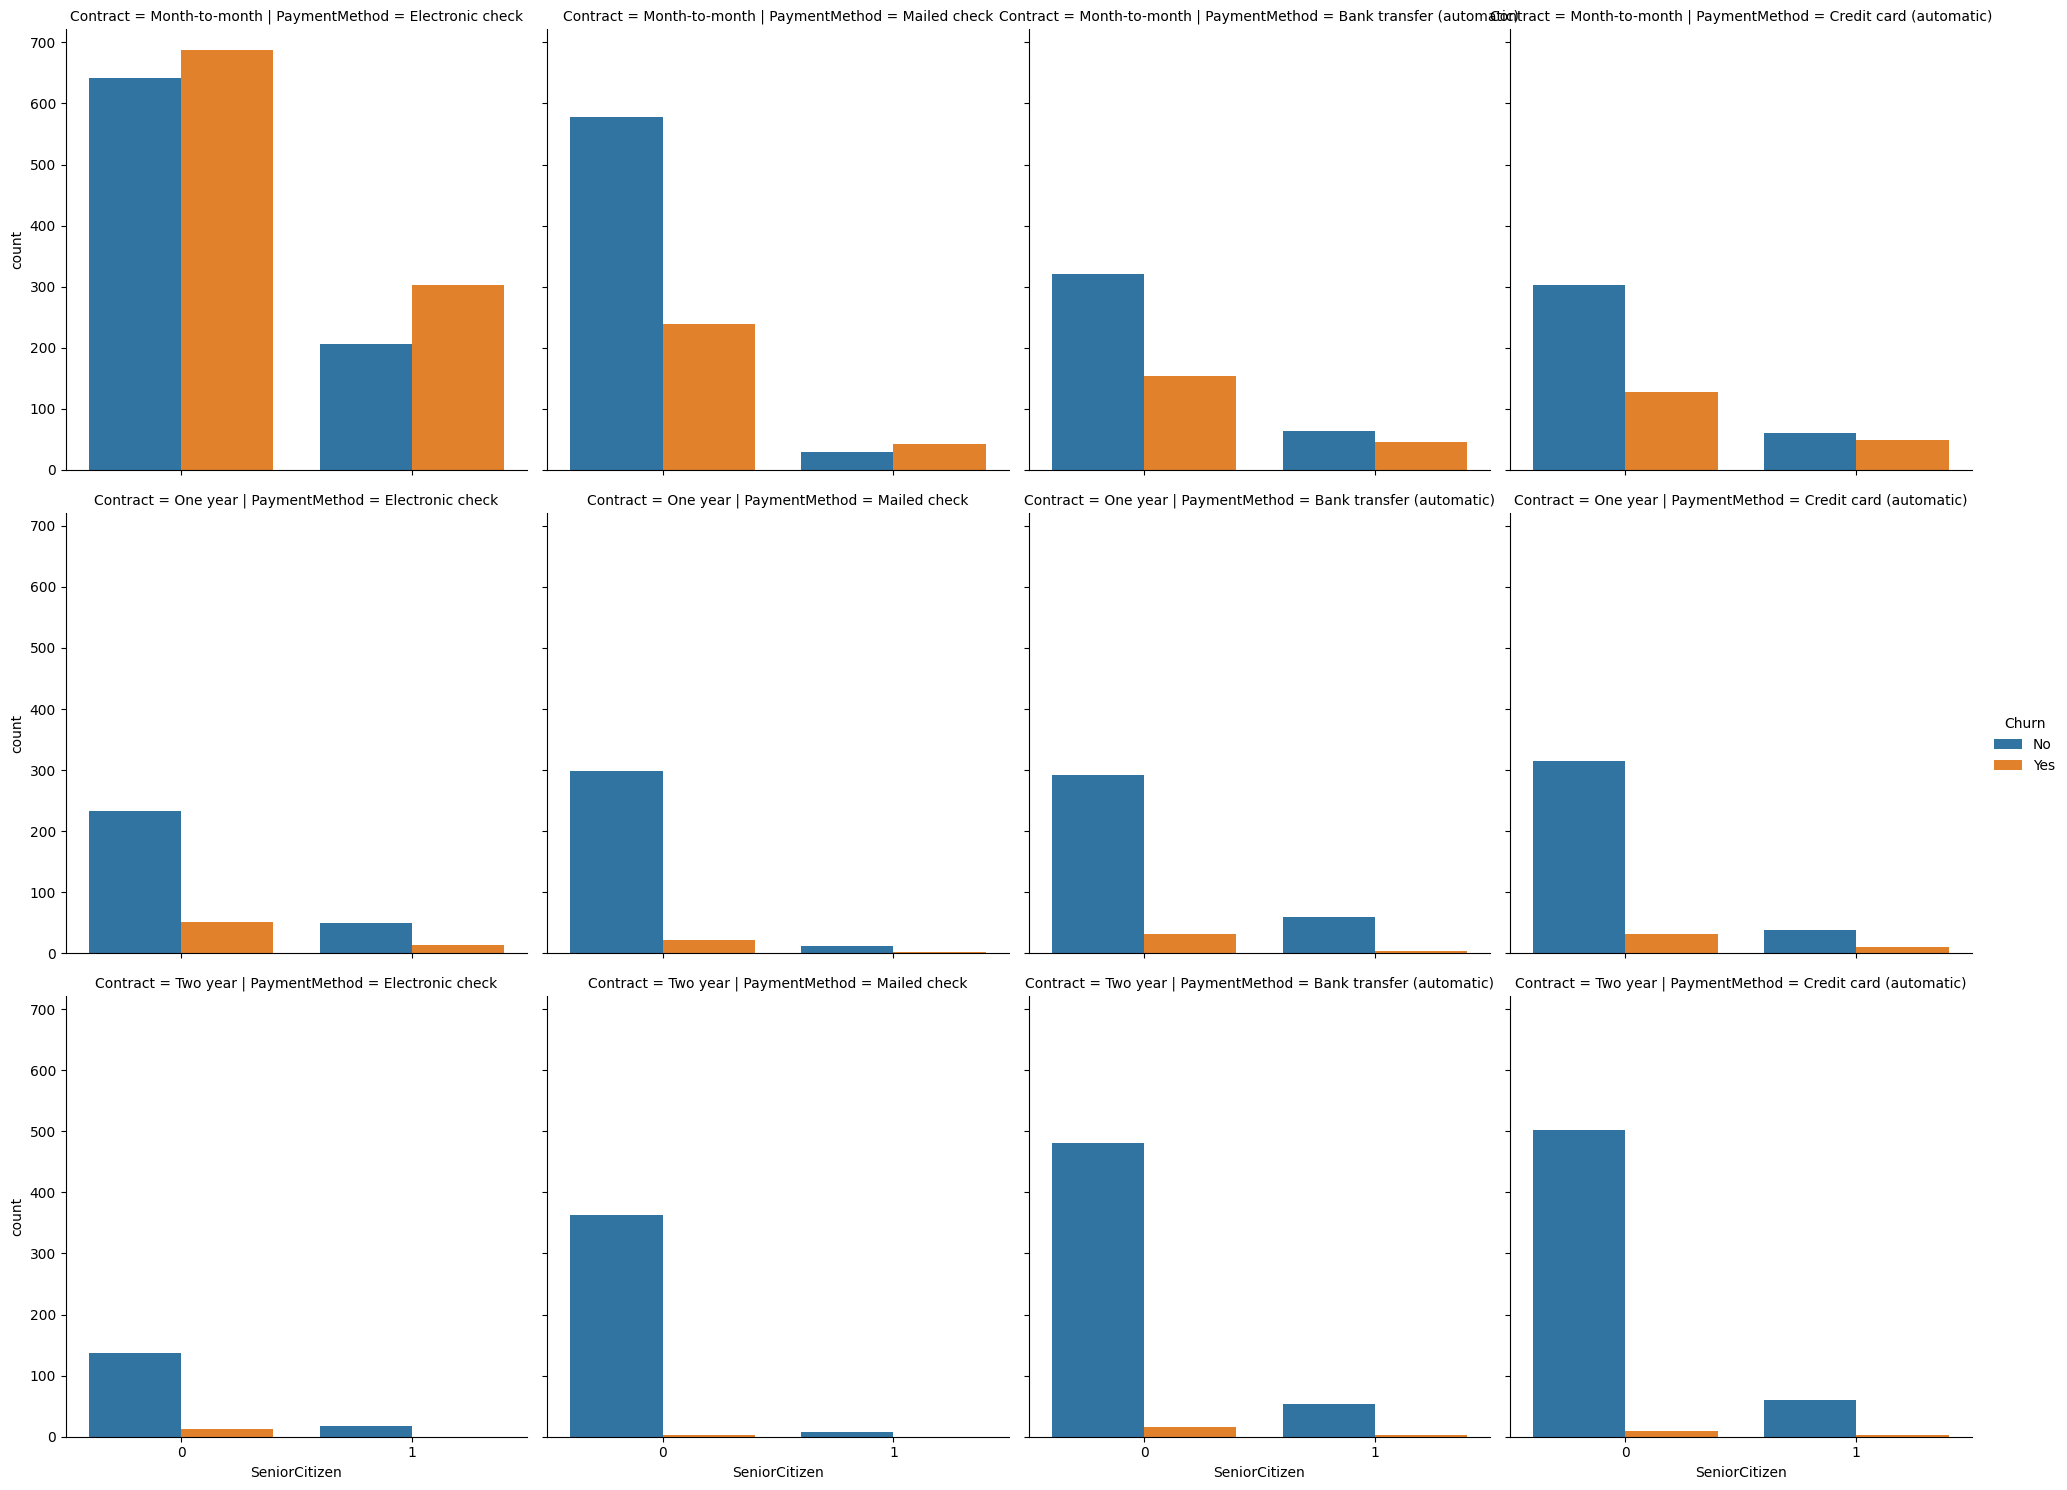

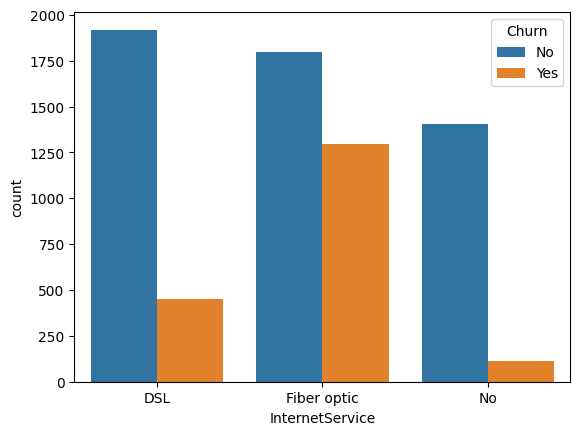

In [58]:
# plotted a countplot to compare rate of senior citizen and churn: from observation seems rate of churn in both senior and non senior is low compared to the reverse
# potted a count to compare type of internet service and churn: from observation they all seem to be doing well with higher no churn rate than churn but fiber optics product need to improve its sastisfaction as it has a higher churn than the rest
#plotted a count plot using the cat function using senior citizen to get a more detailed look on all the customers rather than individually added extra row and column to give a view of the contracts and payment types: it seems non-senior citizens have more month to month contract with eletronic check but also have a high churn rate. Also amongst all other payment platform the two popular payment methods are eletronic check and mailed checked.
sns.countplot(x='SeniorCitizen',hue='Churn',data=data)
plt.show()
sns.catplot(x='SeniorCitizen',hue='Churn',data=data,kind='count',col='PaymentMethod',row='Contract')
plt.show()
sns.countplot(x='InternetService',hue='Churn',data=data)
plt.show()

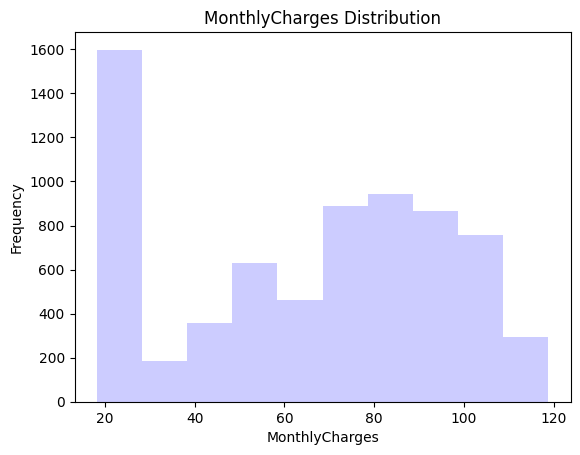

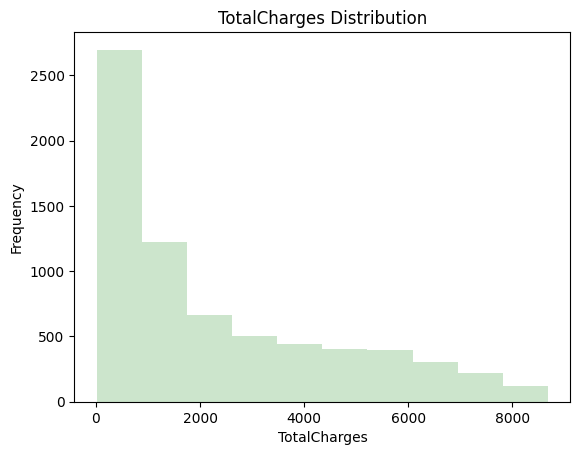

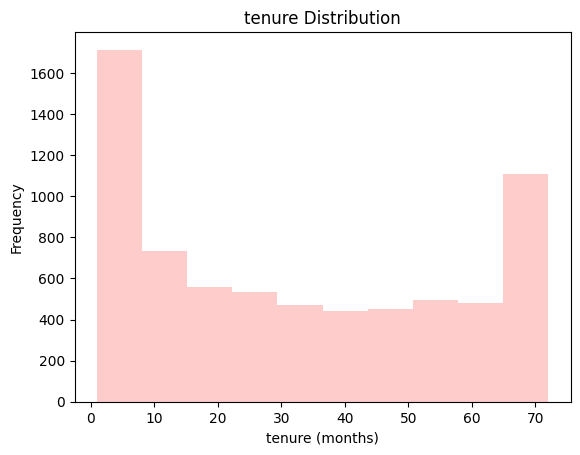

In [59]:
#did a histogram for the numerical data to get the the probability distrubtion aside total charges which is left skewed they seem to have irregular skewedness
plt.hist(data['MonthlyCharges'], bins=10, alpha=0.2, color='blue')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.title('MonthlyCharges Distribution')
plt.show()

# Plot Yearly Charges histogram
plt.hist(data['TotalCharges'], bins=10, alpha=0.2, color='green')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.title('TotalCharges Distribution')
plt.show()

# Plot Tenure histogram
plt.hist(data['tenure'], bins=10, alpha=0.2, color='red')
plt.xlabel('tenure (months)')
plt.ylabel('Frequency')
plt.title('tenure Distribution')
plt.show()

In [60]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,6983.000000,6983.000000,6983.000000
mean,32.387799,64.839081,2281.775218
std,24.534585,30.140637,2268.485701
min,1.000000,18.250000,18.800000
25%,9.000000,35.450000,401.200000
50%,29.000000,70.400000,1395.050000
75%,55.000000,89.950000,3783.200000
max,72.000000,118.750000,8684.800000


In [61]:
# checking for the numerical figures of skewness
MonthlyCharges_skewness=(3*(64.84-70.40))/30.14
tenure_skewness=(3*(32.39-29.00))/24.53
TotalCharges_skewness=(3*(2281.78-1395.05))/2268.49
print("monthly charges:",MonthlyCharges_skewness)
print("tenure_skewness:",tenure_skewness)
print("Totalcharges :",TotalCharges_skewness)

monthly charges: -0.5534173855341741
tenure_skewness: 0.4145943742356299
Totalcharges : 1.17266992580968


<Axes: >

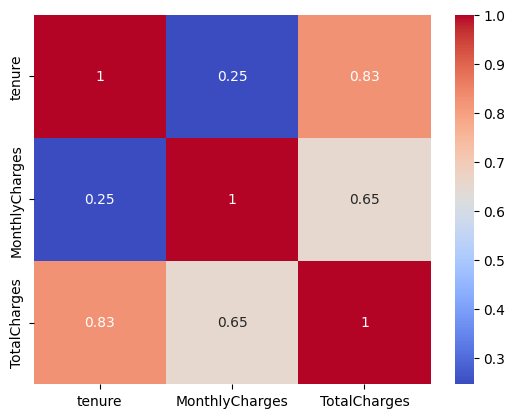

In [62]:
# correlation matrix using a heatmap of numerical figures in the DataFrame
import seaborn as sns

# Select numerical columns (excluding "Churn")
numerical_columns = data.select_dtypes(include='number').columns

# Calculate correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


In [63]:
# finding the p_values for categorical columns
categorical_columns = data.select_dtypes(include='object').columns
Categorical_pv=[]
for column in categorical_columns:
    contingency_table = pd.crosstab(data[column], data['Churn'])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    
    Categorical_pv.append({'Column': column, 'p-value': p_value})
Categorical_pv=pd.DataFrame(Categorical_pv)
Categorical_pv

,Column,p-value
0,customerID,4.943737e-01
1,gender,4.585675e-01
2,SeniorCitizen,1.015589e-36
3,Partner,9.739221e-36
4,Dependents,1.452964e-42
5,PhoneService,2.729001e-01
6,MultipleLines,2.916692e-03
7,InternetService,2.485221e-158
8,OnlineSecurity,1.828144e-186
9,OnlineBackup,9.148909e-132


<Axes: xlabel='tenure', ylabel='TotalCharges'>

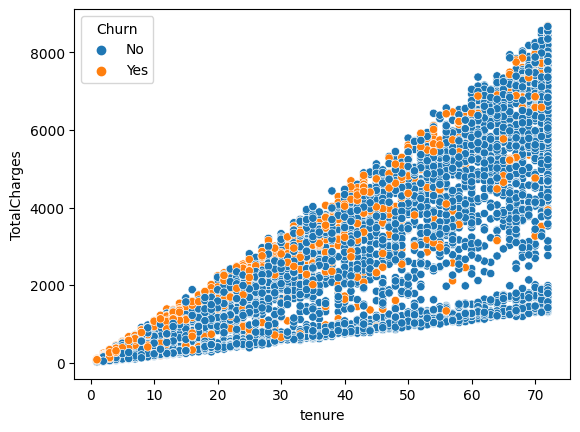

In [64]:
# scatter plot of correlation between tenure and totalcharges in respect to churn
# shows a relative correlation
var1=data['tenure']
var2=data['TotalCharges']
target_var=data['Churn']
sns.scatterplot(data=data,x=var1,y=var2,hue=target_var)

<Axes: xlabel='TotalCharges', ylabel='TotalCharges'>

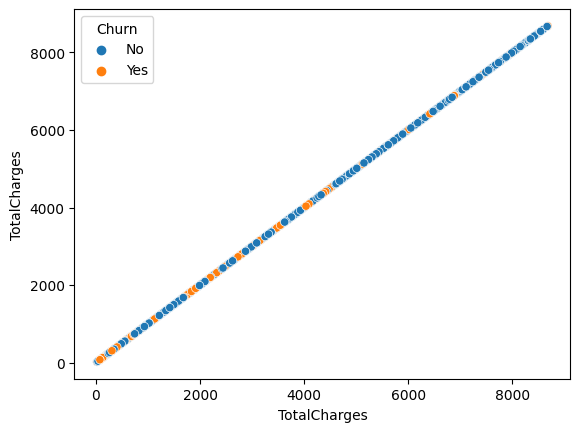

In [65]:
# scatter plot of correlation between totalcharges and totalcharges in respect to churn
#shows very high correlation
var3=data['TotalCharges']
var4=data['TotalCharges']
sns.scatterplot(data=data,x=var3,y=var4,hue=target_var)

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

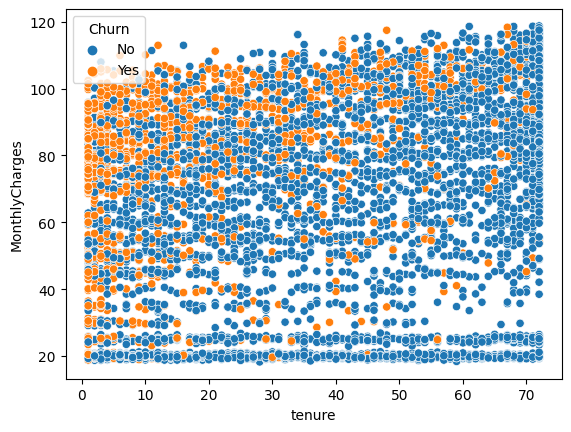

In [66]:
# scatter plot of correlation between tenure and monthlycharges in respect to churn
var5=data['tenure']    #shows tenure and Monthly charges are not correlated
var6=data['MonthlyCharges']
sns.scatterplot(data=data,x=var5,y=var6,hue=target_var)

In [67]:
#Categotical data based on p-values and numerical correlation with churn
selected_columns = ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','tenure','MonthlyCharges','Churn']
sdata = data[selected_columns]

In [68]:
# getting data columns
sdata.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'tenure', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [69]:
sdata

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,Churn
0,0,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1.0,29.85,No
1,0,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,34.0,56.95,No
2,0,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,2.0,53.85,Yes
3,0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),45.0,42.30,No
4,0,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,2.0,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,24.0,84.80,No
7039,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),72.0,103.20,No
7040,0,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,11.0,29.60,No
7041,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,4.0,74.40,Yes


In [70]:
# converting churn to numeric and citizen to int and dropping customer id
sdata['Churn'] = sdata['Churn'].map({'Yes': 1, 'No': 0})
sdata['Churn'] = sdata['Churn'].astype(int)
sdata['SeniorCitizen'] = sdata['SeniorCitizen'].astype(int)

C:\Users\knigh\AppData\Local\Temp\ipykernel_24852\3633162707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['Churn'] = sdata['Churn'].map({'Yes': 1, 'No': 0})
C:\Users\knigh\AppData\Local\Temp\ipykernel_24852\3633162707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['Churn'] = sdata['Churn'].astype(int)
C:\Users\knigh\AppData\Local\Temp\ipykernel_24852\3633162707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [71]:
sdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6983 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     6983 non-null   int32  
 1   Partner           6983 non-null   object 
 2   Dependents        6983 non-null   object 
 3   InternetService   6983 non-null   object 
 4   OnlineSecurity    6983 non-null   object 
 5   OnlineBackup      6983 non-null   object 
 6   DeviceProtection  6983 non-null   object 
 7   TechSupport       6983 non-null   object 
 8   StreamingTV       6983 non-null   object 
 9   StreamingMovies   6983 non-null   object 
 10  Contract          6983 non-null   object 
 11  PaperlessBilling  6983 non-null   object 
 12  PaymentMethod     6983 non-null   object 
 13  tenure            6983 non-null   float64
 14  MonthlyCharges    6983 non-null   float64
 15  Churn             6983 non-null   int32  
dtypes: float64(2), int32(2), object(12)
memory usag

In [72]:
#splitting of data into features and target variable
x=sdata.iloc[:,:-1].values
y=sdata.iloc[:,-1].values.reshape(-1,1)

In [73]:
#splitting of data into train and test set
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [74]:
#applying Standscaler to numerical data and Onehot encoding to categorical data
cols=[1,2,3,4,5,6,7,8,9,10,11,12]
sc=StandardScaler()
x_train[:,13:15]=sc.fit_transform(x_train[:,13:15])
x_test[:,13:15]=sc.transform(x_test[:,13:15])
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cols)], remainder='passthrough')
x_train=np.array(ct.fit_transform(x_train))
x_test=ct.transform(x_test)

In [75]:
#using ravel to aviod dimension error
y_train=y_train.ravel()

In [76]:
#Logistic regression 
model=[]
from sklearn.linear_model import LogisticRegression
LogisticRegression=LogisticRegression()
model1=LogisticRegression.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
y_pred1.reshape(-1,1)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import accuracy_score,classification_report,auc,confusion_matrix
result=accuracy_score(y_test,y_pred1)
result

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


0.8224767358625626

In [77]:
#SVC 
from sklearn.svm import SVC
svc=SVC()
model2=svc.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))
result2=accuracy_score(y_test,y_pred2)
result2

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


0.819613457408733

In [78]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
model3=DT.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(np.concatenate((y_pred3.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))
result3=accuracy_score(y_test,y_pred3)
result3

[[0 0]
 [0 0]
 [1 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


0.7265569076592698

In [79]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model4=knn.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test.reshape(len(y_test),1)),1))
result4=accuracy_score(y_test,y_pred4)
result4

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


0.7759484609878311

In [80]:
#Randomforest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model5=rf.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
print(np.concatenate((y_pred5.reshape(len(y_pred5),1), y_test.reshape(len(y_test),1)),1))
result5=accuracy_score(y_test,y_pred5)
result5

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


0.7967072297780959

In [81]:
Model_Activity=pd.DataFrame({'Models':[model1,model2,model3,model4,model5],'Accuracy-Score':[result,result2,result3,result4,result5]})

In [82]:
#Models and accuracy_score
Model_Activity

,Models,Accuracy-Score
0,LogisticRegression(),0.822477
1,SVC(),0.819613
2,DecisionTreeClassifier(),0.726557
3,KNeighborsClassifier(),0.775948
4,"(DecisionTreeClassifier(max_features='sqrt', r...",0.796707


In [83]:
#parameters for grid search
logistic_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
}

knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
}
decision_tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
}

random_forest_params = {
   'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
}
SVC_param={
    'C': [1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 5],
    }

logistic_grid_search = GridSearchCV(model1, logistic_params, scoring='accuracy', cv=5)
knn_grid_search = GridSearchCV(model4, knn_params, scoring='accuracy', cv=5)
decision_tree_grid_search = GridSearchCV(model3, decision_tree_params, scoring='accuracy', cv=5)
random_forest_grid_search = GridSearchCV(model5, random_forest_params, scoring='accuracy', cv=5)
SVC_grid_search=GridSearchCV(model2, SVC_param, scoring='accuracy', cv=5)

In [84]:
#fitting of gridcv to test_train split
logistic_grid_search.fit(x_train, y_train)
knn_grid_search.fit(x_train, y_train)
decision_tree_grid_search.fit(x_train, y_train)
random_forest_grid_search.fit(x_train, y_train)
SVC_grid_search.fit(x_train, y_train)

c:\Users\knigh\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\knigh\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\knigh\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\knigh\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\knigh\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\knigh\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 10.0], 'degree': [3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [85]:
#model along with best score and best paramters
Model=[model1,model2,model3,model4,model5]
Accuracy_Score=[logistic_grid_search.best_score_,SVC_grid_search.best_score_,decision_tree_grid_search.best_score_,knn_grid_search.best_score_,random_forest_grid_search.best_score_]
Best_Params=[logistic_grid_search.best_params_,SVC_grid_search.best_params_,decision_tree_grid_search.best_params_,knn_grid_search.best_params_,random_forest_grid_search.best_params_]
Grid_Result=pd.DataFrame({'Models':Model,"Accuracy-score":Accuracy_Score,'Best-Parameter':Best_Params},index=None)

In [86]:
Grid_Result

,Models,Accuracy-score,Best-Parameter
0,LogisticRegression(),0.794845,"{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', '..."
1,SVC(),0.793054,"{'C': 10.0, 'degree': 3, 'gamma': 'scale', 'ke..."
2,DecisionTreeClassifier(),0.783922,"{'criterion': 'entropy', 'max_depth': 5, 'min_..."
3,KNeighborsClassifier(),0.766737,"{'algorithm': 'auto', 'n_neighbors': 7, 'p': 2..."
4,"(DecisionTreeClassifier(max_features='sqrt', r...",0.797885,"{'criterion': 'entropy', 'max_depth': 10, 'min..."
